# Universidad de Buenos Aires
# Deep Learning - Examen
# Junio 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 25 de junio a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen ABRIL 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from IPython.display import display, Math
import pandas as pd
import random

## Ejercicio 1



Dado el grafo de cómputo de la siguiente imagen:

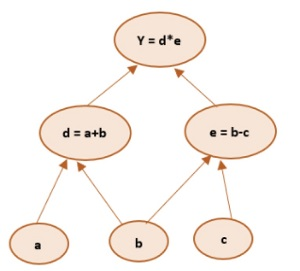

Donde a=1, b=2 y c=3

1. Realizar el paso forward y calcular Y.

2. Realizar el paso backward y calcular el backpropagation para a,b y c:
  
    a. En forma analítica (dy/dx = 0)

    b. Aplicando regla de la cadena

    c. Utilizando pytorch

3. Comparar los resultados del punto 2

## 1

In [2]:
a=1
b=2
c=3

d=a+b
e=b-c
y=d*e

print(y)

-3


## 2

In [3]:
a=torch.tensor(1.0, requires_grad=True)
b=torch.tensor(2.0, requires_grad=True)
c=torch.tensor(3.0, requires_grad=True)

d=a+b
e=b-c
y=d*e

y.backward()
display(Math(fr'\frac{{\partial y}}{{\partial a}} = {a.grad.item()}'))
print()
display(Math(fr'\frac{{\partial y}}{{\partial b}} = {b.grad.item()}'))
print()
display(Math(fr'\frac{{\partial y}}{{\partial c}} = {c.grad.item()}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Ejercicio 2

Si tiene una imagen a procesar de 1024x720x3 y desea aplicar en cascada, 2 capas de convolución, seguido por una capa de activación y una de pooling,  con las siguientes características:

*Conv1:*
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16

*Conv2:*
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32

*activación*
* Tanh()

*pooling*
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5

a) ¿Cual es el tamaño final de la salida y cuantos canales tiene?

b) Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases ¿que tamaño debe tener?






In [4]:
conv1 = torch.nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 7, padding = 2, stride=1)
conv2 = torch.nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, padding = 0, stride=1)
activation = torch.nn.Tanh()
pooling = torch.nn.MaxPool2d(kernel_size=5, padding=0, stride=5)

input_tensor = torch.randn(1, 3, 1024, 720)
print('Tamaño tensor ejemplo')
print(input_tensor.shape)

x = conv1(input_tensor)
x = conv2(x)
x = activation(x)
x = pooling(x)
print('Tamaño final de la salida')
print(x.shape)
print('Tamaño final de salida es 203x142 con 32 canales')

Tamaño tensor ejemplo
torch.Size([1, 3, 1024, 720])
Tamaño final de la salida
torch.Size([1, 32, 203, 142])
Tamaño final de salida es 203x142 con 32 canales


In [5]:
fc = torch.nn.Linear(in_features = x.shape[1]*x.shape[2]*x.shape[3], out_features = 3)
salida = fc(x.view(x.shape[0], -1))
print()
print('Salida final de la fc')
print(salida.shape)

# numero de parametros
total = torch.tensor([0])
print()
for layer in [conv1, conv2, fc]:
  kernel = torch.tensor(layer.weight.shape)
  bias = torch.tensor(layer.bias.shape)
  print(layer)
  print(kernel)
  print(bias)
  print('total')
  total += torch.prod(kernel) + bias
  print(total)

print()
print('La fully connected layer debe tener una entrada de tamaño 922432 para clasificar 3 clases')


Salida final de la fc
torch.Size([1, 3])

Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(2, 2))
tensor([16,  3,  7,  7])
tensor([16])
total
tensor([2368])
Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
tensor([32, 16,  5,  5])
tensor([32])
total
tensor([15200])
Linear(in_features=922432, out_features=3, bias=True)
tensor([     3, 922432])
tensor([3])
total
tensor([2782499])

La fully connected layer debe tener una entrada de tamaño 922432 para clasificar 3 clases


## Ejercicio 3



a) Implemente una red recurrente (como la de la imagen) que:



* Tenga como input una señal de 4 canales (4 features)
* 3 capas ocultas con 20 neuronas.
* Tenga como salida una señal de 2 canales (2 features) de igual longitud que la señal de entrada.


b) Testeear el modelo con una señal random de longitud 20.

c) Indique el total de parámetros entrenables.



![c](https://drive.google.com/uc?export=view&id=1jDMr1hOiHBgkDZepHfOaxWQcaNNntB7W)



Imagen 3 link (https://drive.google.com/file/d/1jDMr1hOiHBgkDZepHfOaxWQcaNNntB7W/view?usp=drive_link)



## a)

In [57]:
class RecurrentNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RecurrentNet, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = torch.nn.RNN(input_size, hidden_size, num_layers=3, batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, hidden = self.rnn(x)
        out = self.fc(out)
        return out

input_size = 4
hidden_size = 20
output_size = 2

net = RecurrentNet(input_size, hidden_size, output_size)

## b)

In [58]:
input_tensor = torch.randn(1, 20, 4)
output_tensor = net(input_tensor)
print(output_tensor.size())

torch.Size([1, 20, 2])


## c)

In [59]:
t_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print(f'total de parámetros entrenables: {t_params}')

total de parámetros entrenables: 2242


## Ejercicio 4


Se desea construir un sistema de recomendación de películas. Para esto se cuenta con un dataset de las puntuaciones que los usuarios han asignado a las peliculas disponibles.

Link dataset: https://drive.google.com/file/d/1Og9H-8oqb3_Wo_WOakeAuRR_mwr922Ar/view?usp=sharing

Para verificar la factibilidad del proyecto con datos válidos, se decide utilizar solamente las 200 películas con más votos y los usuarios que han puntuado al menos 100 películas.

1- Procesar el dataset para utilizar solamente las 200 películas con mayor cantidad de votos y los usuarios que hayan votado al menos 100 películas.

2- A partir del dataset del punto 1, construir una única red neuronal que utilice una capa de embeddings para el id de usuario, una capa de embeddings para el id de película y al menos dos capas lineales que sea capaz de predecir el puntaje que cada usuario colocó a cada pelicula.

3- Elegir un usuario al azar, una película que dicho usuario haya puntuado y verificar la predicción del modelo. Comparar con el puntaje real que el usuario asignó a dicha película.

4- Realizar una recomendación de película para el usuario del punto 3 utilizando los embeddings de usuario o los embeddings de películas. Comprobar si la recomendación es correcta haciendo una predicción del puntuaje con la red neuronal.

### 1

In [7]:
data = pd.read_csv('ratings.csv')
print(data.shape)
top_movies = data['movieId'].value_counts().nlargest(200).index
data = data[data['movieId'].isin(top_movies)]
print(data.shape)
users_votes = data['userId'].value_counts()
active_users = users_votes[users_votes >= 100].index
data = data[data['userId'].isin(active_users)]
print(data.shape)
print()
num_movies = data['movieId'].nunique()
print(num_movies)
num_users = data['userId'].nunique()
print(num_users)

(100836, 4)
(25764, 4)
(8329, 4)

200
63


In [8]:
class MovieRatingDataset(Dataset):
    def __init__(self, data):
        self.user_ids = data['userIndex'].values
        self.movie_ids = data['movieIndex'].values
        self.ratings = data['normalized_rating'].values

    def __len__(self):
        return len(self.user_ids)

    def __getitem__(self, index):
        user_id = self.user_ids[index]
        movie_id = self.movie_ids[index]
        rating = self.ratings[index]

        return user_id, movie_id, rating

In [9]:
min_rating = data['rating'].min()
max_rating = data['rating'].max()
data['normalized_rating'] = (data['rating'] - min_rating) / (max_rating - min_rating)

user_mapping = {id: index for index, id in enumerate(data['userId'].unique())}
data['userIndex'] = data['userId'].map(user_mapping)

movie_mapping = {id: index for index, id in enumerate(data['movieId'].unique())}
data['movieIndex'] = data['movieId'].map(movie_mapping)


dataset = MovieRatingDataset(data)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32)

### 2

In [10]:
class MovieRatingNet(torch.nn.Module):
    def __init__(self, num_users, num_movies, embedding_size):
        super(MovieRatingNet, self).__init__()

        self.user_embedding = torch.nn.Embedding(num_embeddings=num_users, embedding_dim=embedding_size)
        self.movie_embedding = torch.nn.Embedding(num_embeddings=num_movies, embedding_dim=embedding_size)

        self.linear1 = torch.nn.Linear(embedding_size * 2, 64)
        self.linear2 = torch.nn.Linear(64, 32)
        self.linear3 = torch.nn.Linear(32, 1)

    def forward(self, user_ids, movie_ids):
        # Obtener embeddings de usuario y película
        user_embeds = self.user_embedding(user_ids)
        movie_embeds = self.movie_embedding(movie_ids)

        inputs = torch.cat([user_embeds, movie_embeds], dim=1)

        output = self.linear1(inputs)
        output = torch.relu(output)
        output = self.linear2(output)
        output = torch.relu(output)
        output = self.linear3(output)
        return output.squeeze()

In [11]:
num_epochs = 100
net = MovieRatingNet(num_users, num_movies, 16)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [12]:
for epoch in range(num_epochs):
    validation_loss = 0
    for user_ids, movie_ids, ratings in train_dataloader:
        optimizer.zero_grad()

        # Forward pass
        outputs = net(user_ids, movie_ids)

        # Calcular la pérdida
        loss = criterion(outputs, ratings.float())
        validation_loss += loss.item()

        # Backward pass y optimización
        loss.backward()
        optimizer.step()
    validation_loss /= len(train_dataloader)

    # Calcular el error de prueba después de cada época
    with torch.no_grad():
        test_loss = 0
        for user_ids, movie_ids, ratings in test_dataloader:
            outputs = net(user_ids, movie_ids)
            test_loss += criterion(outputs, ratings.float()).item()
        test_loss /= len(test_dataloader)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss:.4f} - Validation Loss: {validation_loss:.4f}')


Epoch [1/100], Test Loss: 0.0382 - Validation Loss: 0.0543
Epoch [2/100], Test Loss: 0.0348 - Validation Loss: 0.0350
Epoch [3/100], Test Loss: 0.0332 - Validation Loss: 0.0318
Epoch [4/100], Test Loss: 0.0324 - Validation Loss: 0.0293
Epoch [5/100], Test Loss: 0.0313 - Validation Loss: 0.0277
Epoch [6/100], Test Loss: 0.0312 - Validation Loss: 0.0262
Epoch [7/100], Test Loss: 0.0302 - Validation Loss: 0.0251
Epoch [8/100], Test Loss: 0.0310 - Validation Loss: 0.0244
Epoch [9/100], Test Loss: 0.0306 - Validation Loss: 0.0234
Epoch [10/100], Test Loss: 0.0302 - Validation Loss: 0.0229
Epoch [11/100], Test Loss: 0.0308 - Validation Loss: 0.0222
Epoch [12/100], Test Loss: 0.0313 - Validation Loss: 0.0214
Epoch [13/100], Test Loss: 0.0331 - Validation Loss: 0.0209
Epoch [14/100], Test Loss: 0.0327 - Validation Loss: 0.0205
Epoch [15/100], Test Loss: 0.0328 - Validation Loss: 0.0199
Epoch [16/100], Test Loss: 0.0326 - Validation Loss: 0.0191
Epoch [17/100], Test Loss: 0.0332 - Validation Lo

### 3

In [47]:
random_user = random.choice(data['userIndex'].unique())
user_movies = data[data['userIndex'] == random_user]['movieIndex'].values
random_movie = random.choice(user_movies)
rating_row = data[(data['userIndex'] == random_user) & (data['movieIndex'] == random_movie)]
actual_rating = rating_row['rating'].values[0]
actual_normalized_rating = rating_row['normalized_rating'].values[0]

user_id_tensor = torch.LongTensor([random_user])
movie_id_tensor = torch.LongTensor([random_movie])

predicted_rating = net(user_id_tensor, movie_id_tensor).item()
print(f'Usuario: {random_user}')
print(f'Película: {random_movie}')
print(f'Puntaje real: {actual_rating}')
print(f'Puntaje real normalizado: {actual_normalized_rating}')
print(f'Puntaje predicho: {predicted_rating}')

Usuario: 28
Película: 92
Puntaje real: 4.0
Puntaje real normalizado: 0.7777777777777778
Puntaje predicho: 0.7952163219451904


### 4

In [52]:
user_embeddings = net.user_embedding.weight.data
movie_embeddings = net.movie_embedding.weight.data
# Embedding del usuario
user_embedding = user_embeddings[user_id_tensor]
# similitud entre el embedding del usuario y los embeddings de películas
movie_similarities = torch.cosine_similarity(user_embedding, movie_embeddings)
# Ordenar las películas en orden descendente
sorted_indices = torch.argsort(movie_similarities, descending=True)
recommended_movies = [list(movie_mapping.keys())[list(movie_mapping.values()).index(idx)] for idx in sorted_indices]
random_movie = movie_mapping[recommended_movies[0]]

In [53]:
rating_row = data[(data['userIndex'] == random_user) & (data['movieIndex'] == random_movie)]
actual_rating = rating_row['rating'].values[0]
actual_normalized_rating = rating_row['normalized_rating'].values[0]

In [54]:
movie_id_tensor = torch.LongTensor([random_movie])
predicted_rating = net(user_id_tensor, movie_id_tensor).item()

In [55]:
print(f'Usuario: {random_user}')
print(f'Película: {random_movie}')
print(f'Puntaje real: {actual_rating}')
print(f'Puntaje real normalizado: {actual_normalized_rating}')
print(f'Puntaje predicho: {predicted_rating}')

Usuario: 28
Película: 18
Puntaje real: 4.5
Puntaje real normalizado: 0.8888888888888888
Puntaje predicho: 0.8448020219802856
